<a href="https://colab.research.google.com/github/ShriRamaMoorthy/Brain-Tumor-Detection/blob/main/01_Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import zipfile
from pathlib import Path

In [ ]:
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.


In [ ]:
print(f"Dataset downloaded to: {path}")
print("Contents of the downloaded directory:")
for item in os.listdir(path):
    print(f"- {item}")
# The dataset is usually already extracted by kagglehub.dataset_download.
# Therefore, explicit zip extraction is often not necessary.
# The 'archive.zip' file is not typically present within the downloaded directory directly.

Dataset downloaded to: /kaggle/input/brain-tumor-mri-dataset
Contents of the downloaded directory:
- Training
- Testing


In [ ]:
trainpath = os.path.join(path, 'Training')
testpath = os.path.join(path, 'Testing')

In [ ]:
trainpath , testpath

('/kaggle/input/brain-tumor-mri-dataset/Training',
 '/kaggle/input/brain-tumor-mri-dataset/Testing')

In [ ]:
print('Training')
print('*'*50)

for classname in sorted(os.listdir(trainpath)):
  classpath = os.path.join(trainpath,classname)
  if os.path.isdir(classpath):
    count=len(os.listdir(classpath))
    print(f'{classname:12} --> {count:4} images')

Training
**************************************************
glioma       --> 1321 images
meningioma   --> 1339 images
notumor      --> 1595 images
pituitary    --> 1457 images


In [ ]:
print('Testing')
print('*'*50)

for classname in sorted(os.listdir(testpath)):
  classpath = os.path.join(testpath,classname)
  if os.path.isdir(classpath):
    count=len(os.listdir(classpath))
    print(f'{classname:12} --> {count:4} images')

Testing
**************************************************
glioma       -->  300 images
meningioma   -->  306 images
notumor      -->  405 images
pituitary    -->  300 images


In [ ]:
import tensorflow as tf

In [ ]:
trainds = tf.keras.utils.image_dataset_from_directory(
    trainpath,
    image_size=(224,224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='training',
    seed=42,
    shuffle=True
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [ ]:
valds = tf.keras.utils.image_dataset_from_directory(
    trainpath,
    image_size=(224,224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=42,
    shuffle=True
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [ ]:
testds = tf.keras.utils.image_dataset_from_directory(
    testpath,
    image_size=(224,224),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

Found 1311 files belonging to 4 classes.


### Let's Explore the data

In [ ]:
# Take one sample off the training data
trainonesample = trainds.take(1)

In [ ]:
trainonesample

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Get class name
classnames = trainds.class_names
classnames

['glioma', 'meningioma', 'notumor', 'pituitary']

Let's loop through our single training sample and get some info from the image and label

In [ ]:
for image , label in trainonesample:
  # label is a tensor representing a batch of labels. Access the first one.
  first_label = label[0]
  print(f"""
  Image shape: {image.shape},
  Image dtype: {image.dtype}
  Target class (tensor form): {first_label}
  Target class datadtype : {type(first_label)}
  class name (str form): {classnames[first_label.numpy()]}
  """)


  Image shape: (32, 224, 224, 3),
  Image dtype: <dtype: 'float32'>
  Target class (tensor form): 2
  Target class datadtype : <class 'tensorflow.python.framework.ops.EagerTensor'>
  class name (str form): notumor
  


In [ ]:
image[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
import tensorflow as tf

In [ ]:
# what are the min and max image values?
tf.reduce_min(image[0]) , tf.reduce_max(image[0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=255.0>)

### Plot an image from the dataset

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

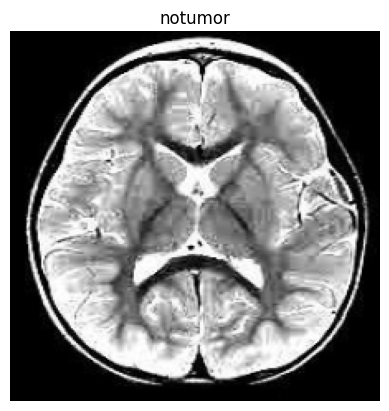

In [ ]:
import matplotlib.pyplot as plt

# Scale the image data to the range [0, 1] for proper display with float data
scaled_image = image[0] / 255.0

plt.imshow(scaled_image)
plt.title(classnames[label[0].numpy()])
plt.axis('off') # Turn off axis labels for cleaner image display

In [ ]:
### Let's Build a model
model1 = tf.keras.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet',
                                   input_shape=(224,224,3),pooling='max'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(len(classnames),activation='softmax')

])

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'] # Simplified metrics to diagnose the error
               )

model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

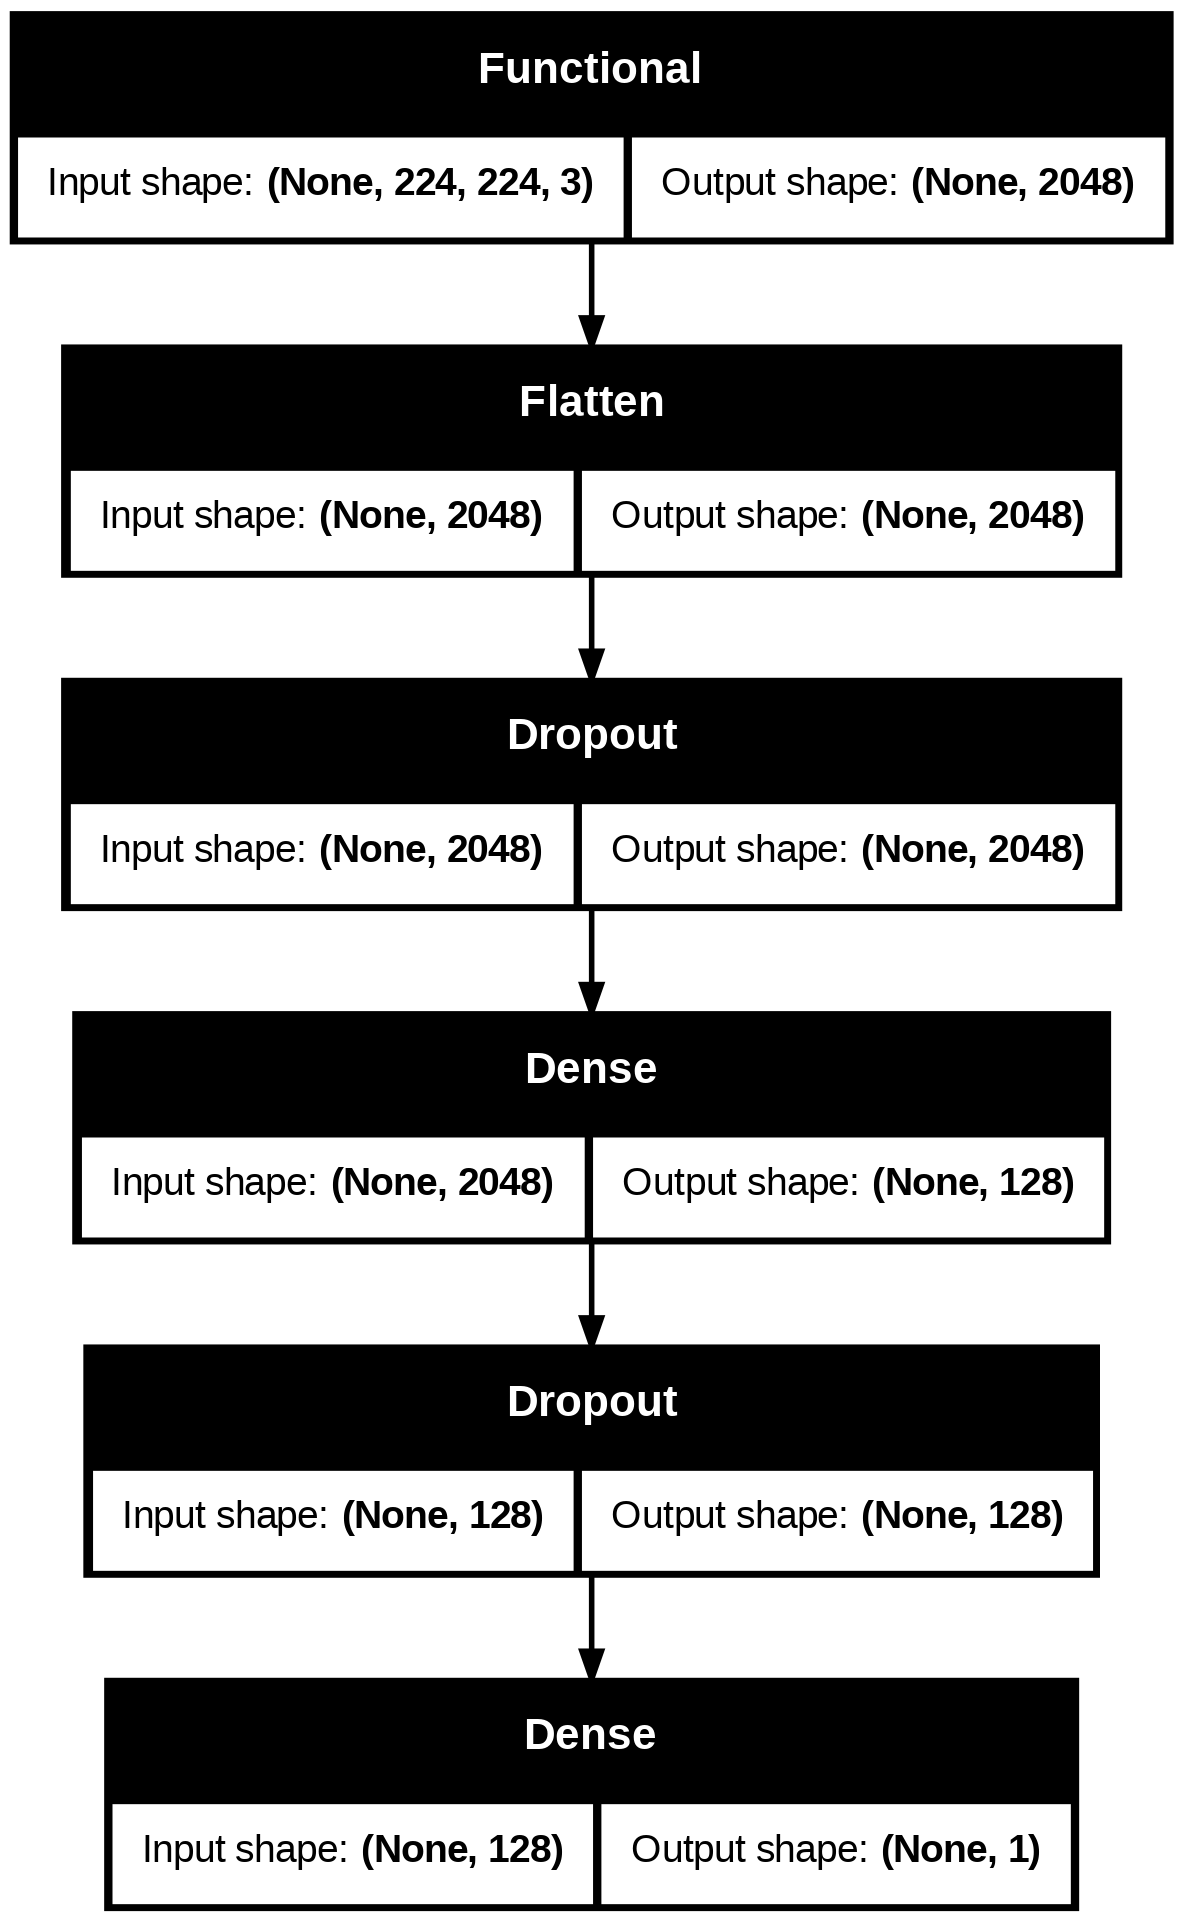

In [ ]:
tf.keras.utils.plot_model(model1,show_shapes=True)

In [ ]:
history1 = model1.fit(trainds,
                          epochs=10,
                          validation_data=valds,
                          )

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 168s 884ms/step - accuracy: 0.7219 - loss: 0.8073 - val_accuracy: 0.7259 - val_loss: 1.5800
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 483ms/step - accuracy: 0.9241 - loss: 0.2289 - val_accuracy: 0.8004 - val_loss: 0.8778
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 481ms/step - accuracy: 0.9593 - loss: 0.1180 - val_accuracy: 0.9247 - val_loss: 0.5779
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 480ms/step - accuracy: 0.9666 - loss: 0.1030 - val_accuracy: 0.8433 - val_loss: 0.5761
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 481ms/step - accuracy: 0.9621 - loss: 0.1400 - val_accuracy: 0.9177 - val_loss: 0.4224
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 485ms/step - accuracy: 0.9794 - loss: 0.0657 - val_accuracy: 0.6095 - val_loss: 2.9471
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 479ms/step - accuracy: 0.9798 - loss: 0.0754 - val_accuracy: 0.9694 - val_loss: 0.1522
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 69s 479ms/step - accuracy: 0.9865 - loss: 

### Testing and Evaluation

In [ ]:
trainscore = model1.evaluate(trainds,verbose=1)
validscore = model1.evaluate(valds,verbose=1)
testscore = model1.evaluate(testds,verbose=1)

print(f'Train Loss : {trainscore[0]:.4f}')
print(f'Train Accuracy : {trainscore[1]*100:.4f}')
print('-'*20)
print(f'Validation Loss : {validscore[0]:.4f}')
print(f'Validation Accuracy : {validscore[1]*100:.4f}')
print('-'*20)
print(f'Test Loss : {testscore[0]:.4f}')
print(f'Test Accuracy : {testscore[1]*100:.4f}')

143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.9600 - loss: 0.1776
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9512 - loss: 0.2597
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 517ms/step - accuracy: 0.9281 - loss: 0.4868
Train Loss : 0.1785
Train Accuracy : 96.3239
--------------------
Validation Loss : 0.3725
Validation Accuracy : 94.3082
--------------------
Test Loss : 0.5642
Test Accuracy : 92.1434
